In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku 
import numpy as np 
import requests
from contextlib import closing

In [18]:
tokenizer = Tokenizer()
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt'
corpus = []
with closing(requests.get(url, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    for line in f:
        values = line.lower().split('\n');
        corpus.append(values[0])

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

#print(input_sequences)
        
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

3211


In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [20]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 6.9190 - accuracy: 0.0224
Epoch 2/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.5000 - accuracy: 0.0227
Epoch 3/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 6.3945 - accuracy: 0.0261
Epoch 4/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.2655 - accuracy: 0.0292
Epoch 5/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.1796 - accuracy: 0.0341
Epoch 6/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.0951 - accuracy: 0.0398
Epoch 7/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.0145 - accuracy: 0.0409
Epoch 8/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 5.9382 - accuracy: 0.0433
Epoch 9/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 5.8498 - accuracy: 0.0484
Epoch

15462/15462 [==============================] - 34s 2ms/sample - loss: 1.5134 - accuracy: 0.7355
Epoch 76/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 1.4842 - accuracy: 0.7433
Epoch 77/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 1.4831 - accuracy: 0.7360
Epoch 78/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 1.4667 - accuracy: 0.7451
Epoch 79/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 1.4383 - accuracy: 0.7513
Epoch 80/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 1.4238 - accuracy: 0.7526
Epoch 81/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 1.4001 - accuracy: 0.7560
Epoch 82/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 1.3837 - accuracy: 0.7590
Epoch 83/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 1.3572 - accuracy: 0.7654
Epoch 84/100
15462/15462 [======

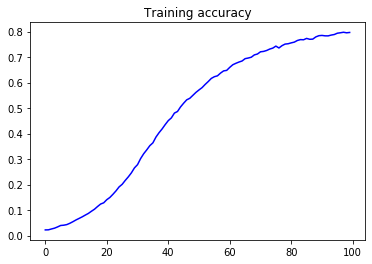

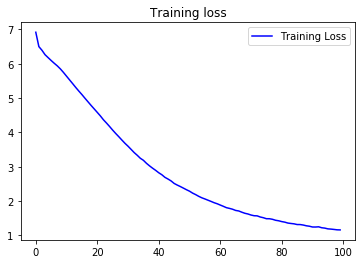

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [24]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that the lie to me bold me to every eyes praise grow true ' see foes commend dumb glory to write thee ' write fair best best to give hence told kind for true deeds to call seem thine ' seem the world still ever me and look so much true grossly ' slain strife woe glory blind heart ' blind prove so true friend true praise thine needing true thee thou heart of thine blind say true write thee thee me such love that best best best best ' awake true love true blind was me true true me
